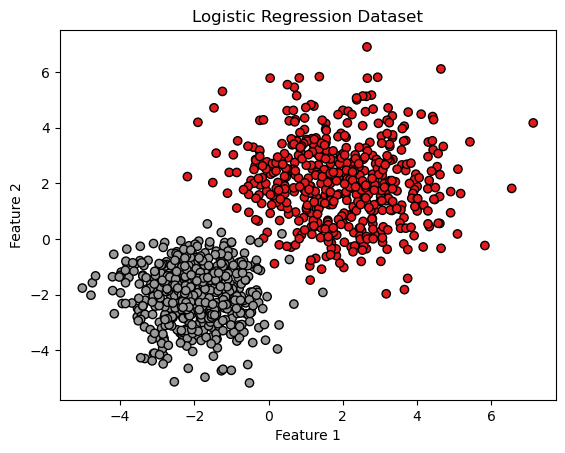

In [1]:
"""激活函数为Sigmoid"""
import numpy as np
import matplotlib.pyplot as plt

"""*设置随机种子（可复现结果）"""
np.random.seed(36)

"""生成随机数据"""
mean_1 = [2, 2]
cov_1 = [[2, 0], [0, 2]]
mean_2 = [-2, -2]
cov_2 = [[1, 0], [0, 1]]

"""生成分类一样本"""
x1 = np.random.multivariate_normal(mean_1, cov_1, 500)
y1 = np.zeros(500)

"""生成分类二样本"""
x2 = np.random.multivariate_normal(mean_2, cov_2, 500)
y2 = np.ones(500)

"""合并标签和样本"""
X = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2))

"""绘制图"""
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Dataset')
plt.show()

In [4]:
"""自定义激活函数（Sigmoid）"""
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
    
"""自定义逻辑回归类"""
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        """把样本的特征数和样本数分离"""
        
        """初始化权重与偏置"""
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        """梯度下降算法"""
        for _ in range(self.max_iter):
            """f(x)=w*x+b"""
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            
            """参数更新，使用的交叉熵损失作为参数更新的损失函数（成本函数），加入l2正则化项"""
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + (self.lambda_ / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return y_pred
            
    def predict(self, X, threshold=0.5):
        y_pred_prob = self.predict_prob(X)
        y_pred = np.zeros_like(y_pred_prob)
        y_pred[y_pred_prob >= threshold] = 1
        return y_pred
            

In [5]:
"""创建逻辑回归模型"""
logreg = LogisticRegression()

"""模型训练"""
logreg.fit(X, y)

"""预测"""
X_new = np.array([[2.3, 2.3], [-3.0, -4.0]])
y_pred_prob = logreg.predict_prob(X_new)
y_pred = logreg.predict(X_new)

print("预测概率为：", y_pred_prob)
print("预测类别为：", y_pred)

预测概率为： [0.00484899 0.99962665]
预测类别为： [0. 1.]


In [6]:
"""sklearn库实现"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

"""划分训练集和测试集"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""创建逻辑回归模型"""
logreg = LogisticRegression()

"""训练模型"""
logreg.fit(X_train, y_train)

"""预测"""
y_pred = logreg.predict(X_test)

"""计算准确率"""
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.995
